download kaggle data

In [9]:
# Download kaggle data in Google Colab
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"a207410167","key":"58d26cc44870539c473b1574c5d7f808"}'}

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!kaggle datasets download -d 'iabhishekofficial/mobile-price-classification'

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 45.7MB/s]


In [12]:
# 建立一個名為mobile-price-classification的資料夾
! mkdir mobile-price-classification

mkdir: cannot create directory ‘mobile-price-classification’: File exists


In [13]:
# 將剛剛載下來的.zip壓縮檔解壓縮進mobile-price-classification資料夾裡
! unzip mobile-price-classification.zip -d mobile-price-classification

Archive:  mobile-price-classification.zip
  inflating: mobile-price-classification/test.csv  
  inflating: mobile-price-classification/train.csv  


In [14]:
#讀取檔案
import pandas as pd
import numpy as np
train = pd.read_csv('mobile-price-classification/train.csv')
test = pd.read_csv('mobile-price-classification/test.csv')

In [15]:
# Observing our data
train.head()
# from the results we can see that the dataset contains, numerical and categorical data types

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
# Clearly our test set is missing the price range column which is our target variable
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


shows the correlations between the feature variables and the price_range

In [17]:
corr = train.corr()
priceCorr = corr.price_range.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
Name: price_range, dtype: float64 

Most Negative Correlations
 n_cores         0.004399
m_dep           0.000853
clock_speed    -0.006606
mobile_wt      -0.030302
touch_screen   -0.030411
Name: price_range, dtype: float64


Feature Selection

In [18]:
#將price_range分配給X
X=train.drop('price_range',axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [19]:
#將訓練數據集特徵分配給y
y = train['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import graphviz
from sklearn import tree

In [21]:
#將資料分為Train以及Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

SVM

In [23]:
from sklearn.svm import SVC

# Define Model
svm = SVC(kernel='linear', probability=True)
#Model Fit
svm.fit(X_train_std, y_train)

SVC(kernel='linear', probability=True)

In [24]:
from sklearn.metrics import confusion_matrix
#Model Preidict
y_pred = svm.predict(X_test_std)
#分類器在不同測試數據集犯的不同類型錯誤的資訊
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 92   0   0   0]
 [  3  89   4   0]
 [  0   5 100   1]
 [  0   0   4 102]]


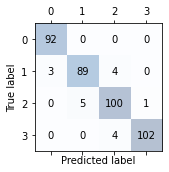

In [25]:
import matplotlib.pyplot as plt
#print confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [26]:
#載入classification_report來看預測和實際數值的差異，包含precision、recall、f1-score及support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
"""
precison = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TN + FP + FN + TP)
F-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。
support代表在測試組y實際值的發生次數。
"""

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       0.95      0.93      0.94        96
           2       0.93      0.94      0.93       106
           3       0.99      0.96      0.98       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



'\nprecison = TP / (TP + FP)\nrecall = TP / (TP + FN)\naccuracy = (TP + TN) / (TN + FP + FN + TP)\nF-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。\nsupport代表在測試組y實際值的發生次數。\n'

In [27]:
#模型分數
from sklearn.metrics import precision_score, recall_score, f1_score
# train Accuracy
svmTrainScore = svm.score(X_train_std, y_train)
print('train Accuracy: %.3f' % svmTrainScore)
#test Accuracy
svmTestScore = svm.score(X_test_std, y_test)
print('test Accuracy: %.3f' % svmTestScore)
#Precision
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='micro'))
#Recall
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='micro'))
#F1
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='micro'))


train Accuracy: 0.975
test Accuracy: 0.958
Precision: 0.958
Recall: 0.958
F1: 0.958


KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Define Model
knnModel = KNeighborsClassifier(n_neighbors=3)
#Model Fit
knnModel.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
from sklearn.metrics import confusion_matrix
#Model Preidict
y_pred = knnModel.predict(X_test_std)
#分類器在不同測試數據集犯的不同類型錯誤的資訊
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[63 25  3  1]
 [38 36 18  4]
 [21 34 35 16]
 [ 1 25 30 50]]


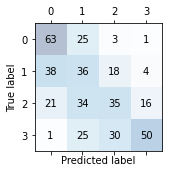

In [30]:
import matplotlib.pyplot as plt
#print confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [31]:
#載入classification_report來看預測和實際數值的差異，包含precision、recall、f1-score及support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
"""
precison = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TN + FP + FN + TP)
F-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。
support代表在測試組y實際值的發生次數。
"""

              precision    recall  f1-score   support

           0       0.51      0.68      0.59        92
           1       0.30      0.38      0.33        96
           2       0.41      0.33      0.36       106
           3       0.70      0.47      0.56       106

    accuracy                           0.46       400
   macro avg       0.48      0.47      0.46       400
weighted avg       0.48      0.46      0.46       400



'\nprecison = TP / (TP + FP)\nrecall = TP / (TP + FN)\naccuracy = (TP + TN) / (TN + FP + FN + TP)\nF-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。\nsupport代表在測試組y實際值的發生次數。\n'

In [32]:
#模型分數
from sklearn.metrics import precision_score, recall_score, f1_score
# train Accuracy
knnTrainScore = knnModel.score(X_train_std, y_train)
print('train Accuracy: %.3f' % knnTrainScore)
#test Accuracy
knnTestScore = knnModel.score(X_test_std, y_test)
print('test Accuracy: %.3f' % knnTestScore)
#Precision
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='micro'))
#Recall
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='micro'))
#F1
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='micro'))


train Accuracy: 0.719
test Accuracy: 0.460
Precision: 0.460
Recall: 0.460
F1: 0.460


Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Define Model
dt = DecisionTreeRegressor(max_leaf_nodes=200,random_state = 1)
#Model Fit
dt.fit(X_train_std, y_train)

DecisionTreeRegressor(max_leaf_nodes=200, random_state=1)

In [34]:
from sklearn.metrics import confusion_matrix
#Model Preidict
y_pred = dt.predict(X_test_std)
#分類器在不同測試數據集犯的不同類型錯誤的資訊
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[83  9  0  0]
 [13 75  8  0]
 [ 0 16 77 13]
 [ 0  0 10 96]]


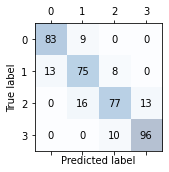

In [35]:
import matplotlib.pyplot as plt
#print confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [36]:
#載入classification_report來看預測和實際數值的差異，包含precision、recall、f1-score及support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
"""
precison = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TN + FP + FN + TP)
F-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。
support代表在測試組y實際值的發生次數。
"""

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        92
           1       0.75      0.78      0.77        96
           2       0.81      0.73      0.77       106
           3       0.88      0.91      0.89       106

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



'\nprecison = TP / (TP + FP)\nrecall = TP / (TP + FN)\naccuracy = (TP + TN) / (TN + FP + FN + TP)\nF-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。\nsupport代表在測試組y實際值的發生次數。\n'

In [37]:
#模型分數
from sklearn.metrics import precision_score, recall_score, f1_score
# train Accuracy
dtTrainScore = dt.score(X_train_std, y_train)
print('train Accuracy: %.3f' % dtTrainScore)
#test Accuracy
dtTestScore = dt.score(X_test_std, y_test)
print('test Accuracy: %.3f' % dtTestScore)
#Precision
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='micro'))
#Recall
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='micro'))
#F1
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='micro'))


train Accuracy: 1.000
test Accuracy: 0.860
Precision: 0.828
Recall: 0.828
F1: 0.828


Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Define Model
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=3,n_jobs=2)
#Model Fit
forest.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=3)

In [39]:
from sklearn.metrics import confusion_matrix
#Model Preidict
y_pred = forest.predict(X_test_std)
#分類器在不同測試數據集犯的不同類型錯誤的資訊
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[85  7  0  0]
 [12 78  6  0]
 [ 1 21 73 11]
 [ 0  0 21 85]]


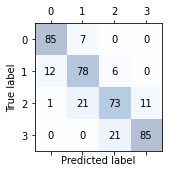

In [40]:
import matplotlib.pyplot as plt
#print confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [41]:
#載入classification_report來看預測和實際數值的差異，包含precision、recall、f1-score及support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
"""
precison = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TN + FP + FN + TP)
F-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。
support代表在測試組y實際值的發生次數。
"""

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        92
           1       0.74      0.81      0.77        96
           2       0.73      0.69      0.71       106
           3       0.89      0.80      0.84       106

    accuracy                           0.80       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.80      0.80      0.80       400



'\nprecison = TP / (TP + FP)\nrecall = TP / (TP + FN)\naccuracy = (TP + TN) / (TN + FP + FN + TP)\nF-beta score可視為precision和recall加權平均的值，數值介於0-1，最好是1。\nsupport代表在測試組y實際值的發生次數。\n'

In [42]:
#模型分數
from sklearn.metrics import precision_score, recall_score, f1_score
# train Accuracy
dtTrainScore = dt.score(X_train_std, y_train)
print('train Accuracy: %.3f' % dtTrainScore)
#test Accuracy
dtTestScore = dt.score(X_test_std, y_test)
print('test Accuracy: %.3f' % dtTestScore)
#Precision
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='micro'))
#Recall
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='micro'))
#F1
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='micro'))


train Accuracy: 1.000
test Accuracy: 0.860
Precision: 0.802
Recall: 0.802
F1: 0.802
